In [14]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
PV_data = pd.read_csv('PV_data.csv', header=None).to_numpy()
input_data = PV_data[0:4, :]
output_data = PV_data[4:6, :]
input_obs = input_data.shape[1]
np.random.seed(42)
random_seq = np.random.permutation(input_obs)
training_data_input = input_data[:,random_seq[0:math.floor(0.75*input_obs)]]
training_data_input_mean = np.mean(training_data_input, axis = 1, keepdims=True)
training_data_input_std = np.std(training_data_input, axis = 1, keepdims=True)
training_data_input = (training_data_input-training_data_input_mean)/training_data_input_std
training_data_output = output_data[:,random_seq[0:math.floor(0.75*input_obs)]]
dev_data_input = input_data[:,random_seq[math.floor(0.75*input_obs):]]
dev_data_input = (dev_data_input-training_data_input_mean)/training_data_input_std
dev_data_output = output_data[:,random_seq[math.floor(0.75*input_obs):]]


In [16]:
stress_pred_model = Sequential()
stress_pred_model.add(Dense(32, input_shape=(4,), activation='relu'))
stress_pred_model.add(Dense(32, activation='relu'))
stress_pred_model.add(Dense(32, activation='relu'))
stress_pred_model.add(Dense(32, activation='relu'))
stress_pred_model.add(Dense(2))

In [17]:
stress_pred_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 3,394
Trainable params: 3,394
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
stress_pred_model.compile(optimizer=opt, loss=tf.keras.losses.MeanSquaredError())
hist_obj = stress_pred_model.fit(training_data_input.T, training_data_output.T, epochs=1000, verbose=0, batch_size = 64, validation_data=(dev_data_input.T, dev_data_output.T))

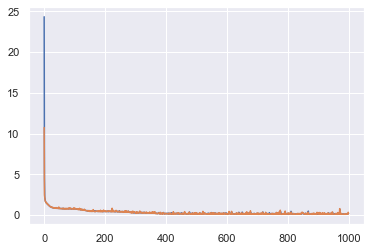

In [19]:
plt.plot(np.sqrt(hist_obj.history['loss'])/1e6)
plt.plot(np.sqrt(hist_obj.history['val_loss'])/1e6)
plt.show()

In [20]:
np.sqrt(hist_obj.history['loss'][-1])/1e6

0.18484211606665835

In [21]:
np.sqrt(hist_obj.history['val_loss'][-1])/1e6

0.1808086935962981

In [22]:
compare = stress_pred_model.predict(training_data_input.T)
compare = np.append(compare, training_data_output.T, axis=1)